# 5.2 Матрицы дифференцирования для чебышёвских узлов

In [16]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

Функция принимает на вход границы $\left[a, b\right]$, число узлов $n$ и саму функцию $f(x)$. Функция вычисляет чебышёвские узлы, создает плотную матрицу дифференцирования по этим узлам.

Для узлов Чебышева степени $n$ верно:
$$
x_k = \frac{1}{2}\left(a+b\right) + \frac{1}{2}\left(b-a\right)\cdot\cos\left(\frac{2k-1}{2n}\pi\right),k = 1, \ldots, n.
$$

Плотная матрица дифференциирования будет иметь вид:
$$
D_{ij} = \frac{\prod\limits_{k = 0, k\ne i, k\ne j}^{n} (x_i - x_k)}{\prod\limits_{k = 0, k\ne j}^{n} (x_j - x_k)}, i \ne j
$$
$$
D_{ii} = \sum_{k=0, k\ne i}^n \frac{1}{x_i - x_k}, i = j.
$$

In [14]:
def diff_func(a, b, n, f):
    
    # нули многочлена Чебышева
    x = 0.5*(a+b) + 0.5*(b-a)*np.sort(np.cos(np.pi*(2*np.arange(1, n+1)-1)/(2*n)))
    
    D = np.ones((n, n))
    for i in np.arange(n):
        for j in np.arange(n):
            # первый случай
            if i != j:
                for k in np.arange(n):
                    if k != i and k != j:
                        D[i, j] *= x[i] - x[k]
                    if k != j:
                        D[i, j] /= x[j] - x[k]
            # воторой случай
            else:
                D[j, j] = 0
                for k in np.arange(n):
                    if k != j:
                        D[j, j] += 1 / (x[j] - x[k])
    return D @ f(x)

In [30]:
def f(x):
    return np.exp(2*x) - 1

def diff_f(x):
    return 2*np.exp(2*x)

it = 150
errors = np.zeros(it)
a = -2.0
b = 2.0

for k in np.arange(it):
    n = k + 2 # Число узлов в сетке
    diffs = diff_func(a, b, n, f)
    x = 0.5*(a+b) + 0.5*(b-a)*np.sort(np.cos(np.pi*(2*np.arange(1, n+1)-1)/(2*n)))
    errors[k] = np.linalg.norm(diff_f(x) - diffs, np.inf)

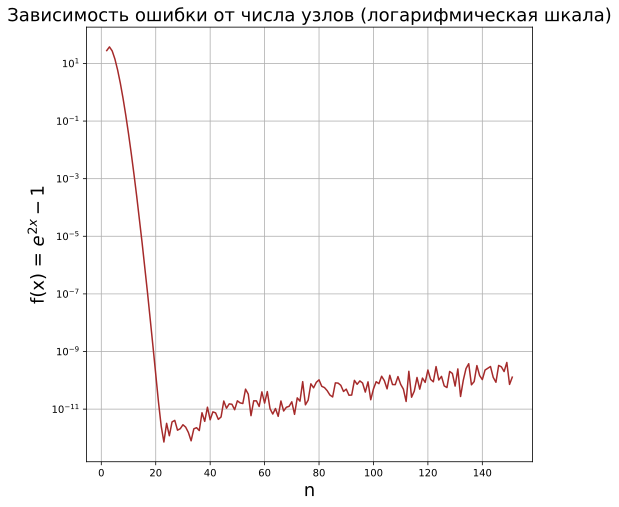

In [31]:
plt.figure(figsize=(8, 8))


x = np.arange(errors.shape[0]) + 2
y = errors
plt.xlabel('n', fontsize=18)
plt.ylabel('f(x) = $e^{2x} -1$', fontsize=18)
plt.title('Зависимость ошибки от числа узлов (логарифмическая шкала)', fontsize=18)
plt.grid()
plt.semilogy(x, y, color='brown');